In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD, Adam

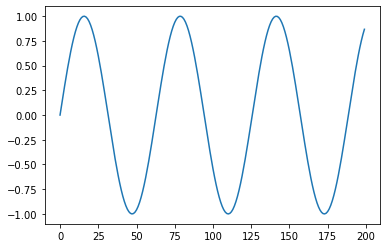

In [40]:
# Let's make a distribution of points that lie on a sin curve.
series = np.sin(0.1*np.arange(200))
plt.plot(series)
plt.show()

<function matplotlib.pyplot.show>

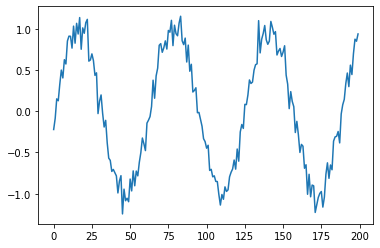

In [41]:
# Let's add some noise to make it more realistic.
series+= np.random.randn(200)*0.1
plt.plot(series)
plt.show

In [42]:
# Making the required dataset. Let's take the Series Time to be 10
T = 10
X = []
y = []
for t in range(len(series)-T):
  t1 = series[t:t+T]
  X.append(t1)
  y.append(series[T+t])
X = np.array(X).reshape(-1, T)
y = np.array(y)
print(X.shape)
print(y.shape)

(190, 10)
(190,)


In [43]:
# Making the Auto Regressive Model

i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))

In [44]:
# Fitting it to training data.
N = len(X)
r = model.fit(x = X[:-N//2], y = y[:-N//2], validation_data=(X[-N//2:], y[-N//2:]), epochs = 30)

Epoch 1/30
3/3 [==============================] - 0s 114ms/step - loss: 3.4680 - val_loss: 0.1884
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 0.2908 - val_loss: 0.8212
Epoch 3/30
3/3 [==============================] - 0s 14ms/step - loss: 1.1888 - val_loss: 0.6714
Epoch 4/30
3/3 [==============================] - 0s 14ms/step - loss: 0.6195 - val_loss: 0.0791
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0951 - val_loss: 0.2079
Epoch 6/30
3/3 [==============================] - 0s 15ms/step - loss: 0.3467 - val_loss: 0.2934
Epoch 7/30
3/3 [==============================] - 0s 15ms/step - loss: 0.3908 - val_loss: 0.0829
Epoch 8/30
3/3 [==============================] - 0s 17ms/step - loss: 0.0756 - val_loss: 0.0903
Epoch 9/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1043 - val_loss: 0.1706
Epoch 10/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1700 - val_loss: 0.0827
Epoch 11/30
3/3 [===========

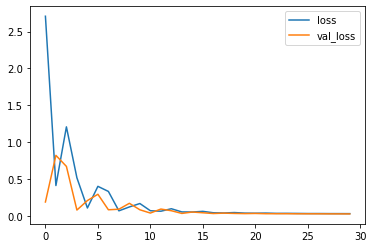

In [45]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [46]:
target = y[-N//2:]
preds = []

inp_X_series = X[-N//2]
while (len(preds) < len(target)):
  p = model.predict(inp_X_series.reshape(1,-1))[0,0]
  preds.append(p)
  inp_X_series = np.roll(inp_X_series, -1) #Shift the whole X left. Then change the last element to predicted value.
  inp_X_series[-1] = p #Append the new predicted label to X for predicting next y

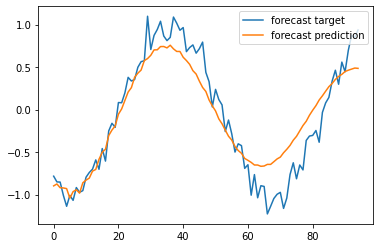

In [47]:
plt.plot(target, label='forecast target')
plt.plot(preds, label='forecast prediction')
plt.legend()

In [47]:
# We can see that this auto-regreesive model also diminishes the effect of noise.